In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
%matplotlib inline

In [11]:
f = open('co2-calc-367923-default-rtdb-export.json')
data = json.load(f)

In [52]:
pi_co2_total = 0
student_co2_total = 0 
post_doc_co2_total = 0
distances = []
emissions = []
for entry in data:
    per_person = 
    if (data[entry]['role'] =='PhD') or (data[entry]['role']=='Masters') or (data[entry]['role']=='Undergraduate'):
        student_co2_total += float(data[entry]['total_co2'])
    elif(data[entry]['role'] =='Post_doc'):
        post_doc_co2_total += float(data[entry]['total_co2'])
    elif(data[entry]['role'] == 'PI'):
        pi_co2_total += float(data[entry]['total_co2'])
        
    distances.append(float(data[entry]['distance']))
    emissions.append(float(data[entry]['total_co2']))
cumulative_distances = [np.sum(distances[:i]) for i in range(len(distances))]
cumulative_emm = [np.sum(emissions[:i]) for i in range(len(emissions))]

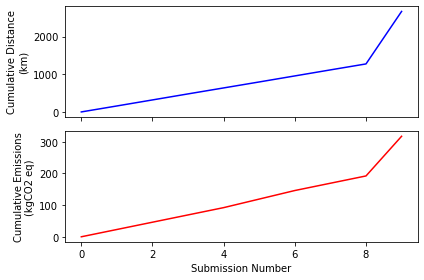

In [60]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(cumulative_distances,color="blue")
ax[1].plot(cumulative_emm,color="r")
ax[0].set_ylabel('Cumulative Distance\n(km)')
ax[1].set_ylabel('Cumulative Emissions\n(kgCO2 eq)')
ax[1].set_xlabel('Submission Number')
plt.tight_layout()
plt.savefig('overtime.png',dpi=400)

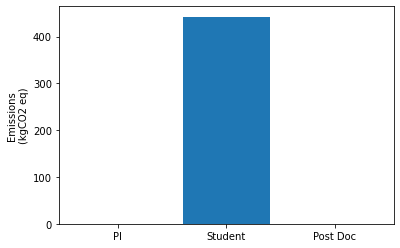

In [57]:
fig,ax = plt.subplots()
ax.bar(['PI','Student','Post Doc'],[pi_co2_total,student_co2_total,post_doc_co2_total])
ax.set_ylabel('Emissions\n(kgCO2 eq)')
plt.savefig('groups.png',dpi=400)